# DSC550 - Project Milestone 1

One fun fact about myself is that in my undergrad, I minored in Sommelier. A sommelier, or wine steward, is a trained and knowledgeable wine professional, normally working in fine restaurants, who specializes in all aspects of wine service as well as wine and food pairing.

According to the International Organisation Of Vine and Wine’s annual report, global wine sales reached a record figure of $41.24 billion in 2022. The wine industry is huge and more popular than ever. But what makes a wine popular enough to sell? Everyone's taste is subjective, but there could be trends in acidity, sugar or alcohol content that tend to be found in wines that are rated well.

The following dataset examines the properties of red wine from Portugal, listing the chemical properties, as well as how its quality was rated from 0-10. I will be building a predictive model that attempts to predict how a wine will be rated based on its properties. It is assumed that a higher rated wine will be more profitable.

https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wine = pd.read_csv(r"C:\Users\User\School\Set3\final\wine\winequality-red.csv")

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
def histogram(wine, a):
    plt.hist(wine[f'{a}'])
    plt.xlabel(f'{a}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {a}')
    plt.grid(True)
    plt.show()
    
def scatter(wine, a, b):
    plt.scatter(wine[f'{a}'], wine[f'{b}'])
    plt.xlabel(f'{a}')
    plt.ylabel(f'{b}')
    plt.title(f'{a} vs {b}')
    plt.grid(True)
    plt.show()

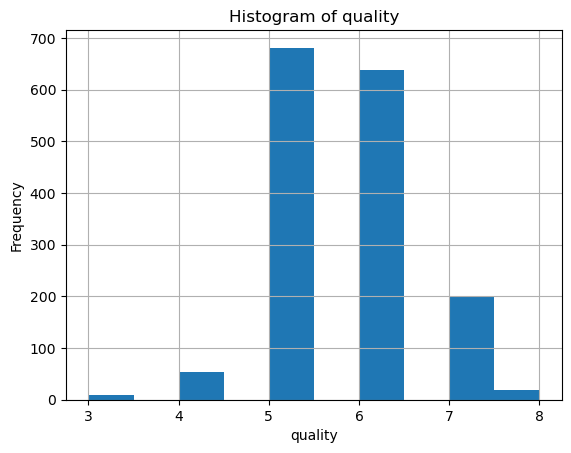

In [4]:
histogram(wine, 'quality')

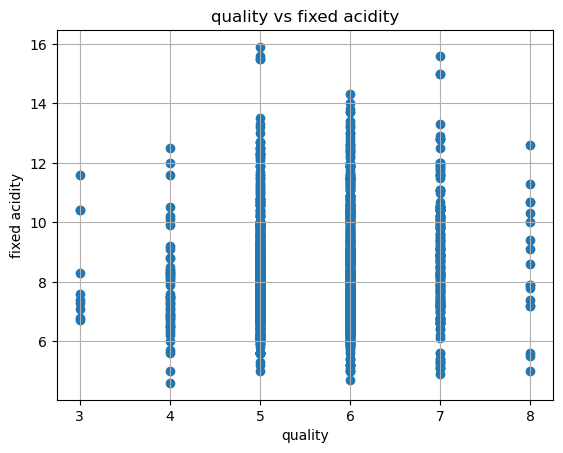

In [5]:
scatter(wine, 'quality', 'fixed acidity')

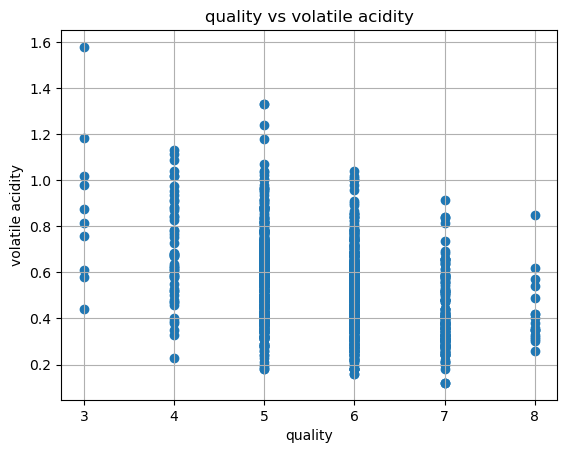

In [6]:
scatter(wine, 'quality', 'volatile acidity')

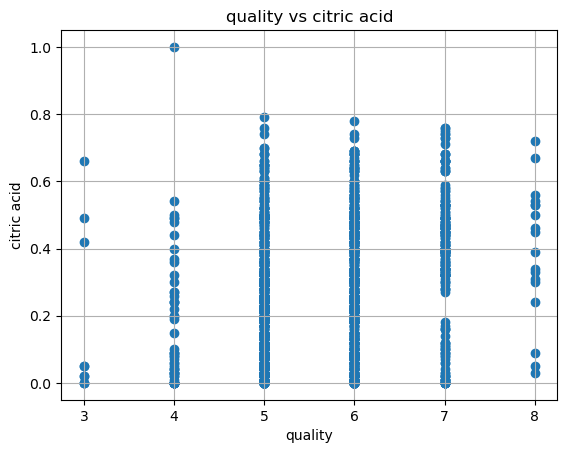

In [7]:
scatter(wine, 'quality', 'citric acid')

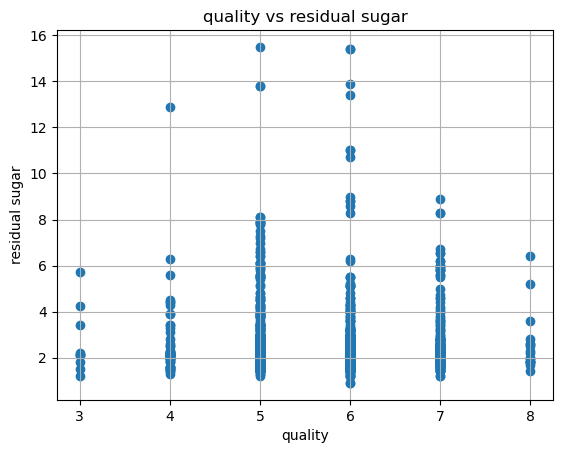

In [8]:
scatter(wine, 'quality', 'residual sugar')

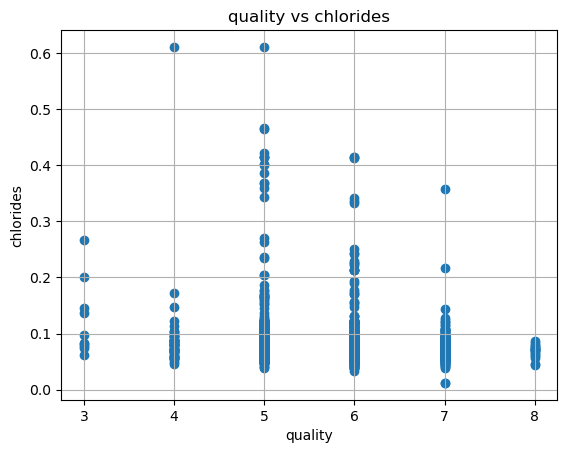

In [9]:
scatter(wine, 'quality', 'chlorides')

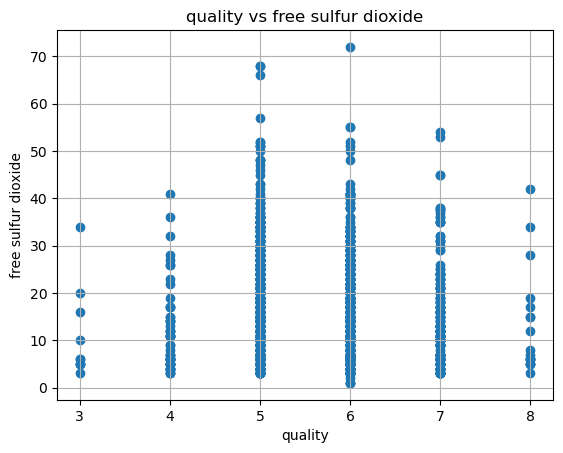

In [10]:
scatter(wine, 'quality', 'free sulfur dioxide')

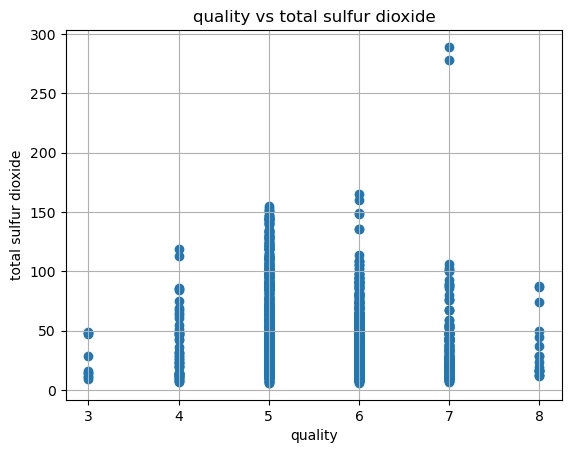

In [11]:
scatter(wine, 'quality', 'total sulfur dioxide')

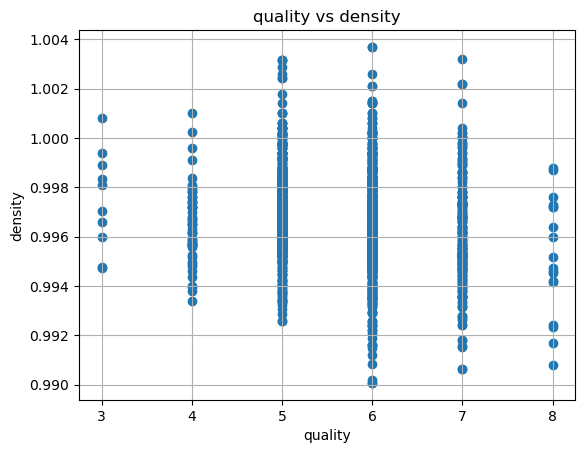

In [12]:
scatter(wine, 'quality', 'density')

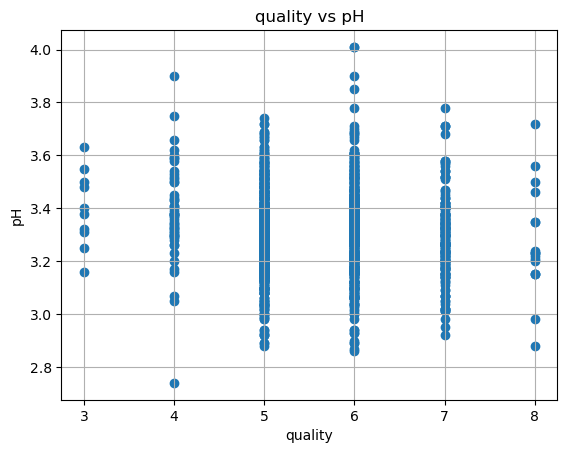

In [13]:
scatter(wine, 'quality', 'pH')

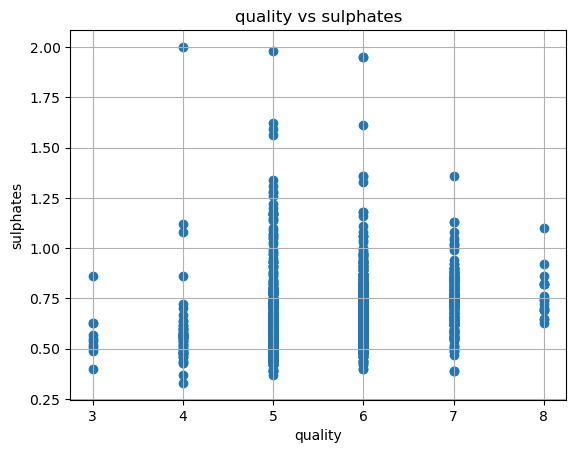

In [14]:
scatter(wine, 'quality', 'sulphates')

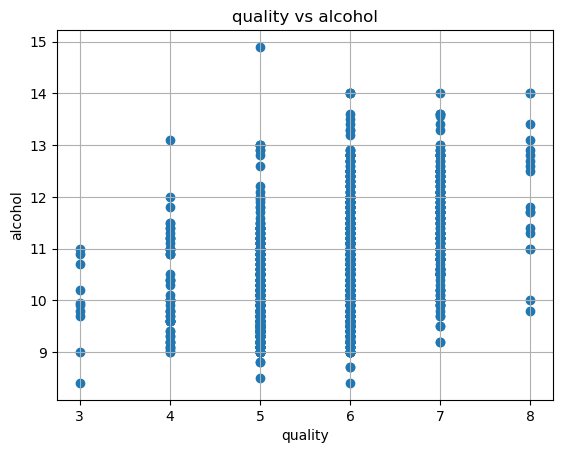

In [15]:
scatter(wine, 'quality', 'alcohol')

By examening the above graphs that compare the rating of the wines to all of the other variables, we can see a few light trends. The most obvious being that alcohol seems to have a mild positive correlation with quality. Sulphates and Citric Acid also have a positive correlation, whereas Chlorides have a negative corrlation.

This seems to suggest that a wine will be perceived as higher quality when it contains sulphates, and has a higher level of citric acid and alcohol, with minimal chlorides.

# DSC550 - Project Milestone 2

In the DF we can see there are two sets of similarly named columns, fixed acidity and volatile acidity, and free sulfur dioxide and total sulfur dioxide. What are these variables and are they all relevant?

Lets begin with fixed vs volatile acidity to determine if one of these varaiables can be dropped. Fixed acidity refers to the total concentration of titratable acids in a wine, mainly malic, lactic, tartaric and citric acids. Volatile acids differ from the fixed acids in that they cannot be measured through titration (think pH color change measurement). Volatile acids must be measured using steam distilation, and is mainly composed of formic, acetic, propionic and butyric acids. Reaching a proper pH balance in wine is important, as too little and a wine will taste flat, but too much can cause sourness. Since both acid types are different, they will be left in.

How about free sulfur dioxide and total sulfur dioxide? Sulfur dioxide or SO2 is used throughout the food industry as a way to prevent oxidization. Free sulfer refers to SO2 in wine that has not reacted yet and is still protecting the wine, as soon as the cork comes out, thats it and the clock is ticking on shelf life. Total sulfer includes the free sulfur level as well as bound sulfur, which is SO2 that has reacted with the chemicals in the wine and "bound" itself to the wine, making it no longer useful for preservation. Bound sulfites greatly reduce the aromatic qualities in wine.

Since all of these four factors individually effect the wine in different ways, they will all be left in and none will be dropped.

### Engineer new features.

For the purpose of model training I am going to create a binary variable based on the wines rating, if the wine is rated at 7 or higher it will be considered a quality wine and will be marked with a 1, otherwise it will be marked with a 0.

In [16]:
def binary_converter(num):
    if num >= 7:
        return 1
    else:
        return 0

In [17]:
wine['binary quality'] = wine['quality'].apply(binary_converter)

In [18]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binary quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


When drinking wine, when a wine has a high sugar content, the wine must also have acidity to cut through the sweetness, or else the wine may come across like drinking maple syrup. I will create a new variable that tracks the total acidity ratio to sweetness.

In [19]:
wine['total acidity'] = wine['fixed acidity'] + wine['volatile acidity'] + wine['citric acid']

In [20]:
wine['sugar acid ratio'] = wine['residual sugar'] / wine['total acidity']

Since total sulfur includes the free sulfur, lets create another variable that tells us the SO2 that is in the wine.

In [21]:
wine['bound sulfur dioxide'] = wine['total sulfur dioxide'] - wine['free sulfur dioxide']

In [22]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binary quality,total acidity,sugar acid ratio,bound sulfur dioxide
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,8.10,0.234568,23.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,8.68,0.299539,42.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,8.60,0.267442,39.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,12.04,0.157807,43.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,8.10,0.234568,23.0


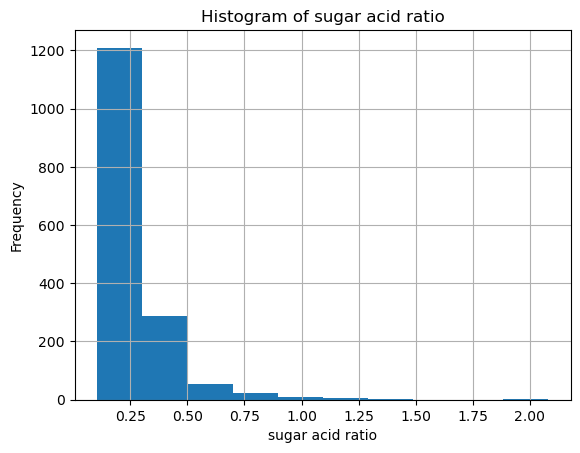

In [23]:
histogram(wine, 'sugar acid ratio')

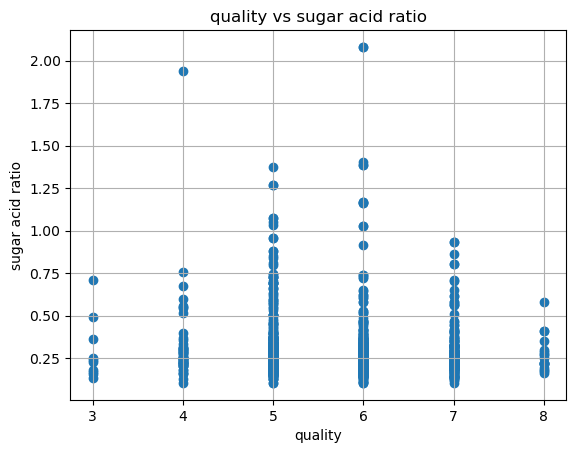

In [24]:
scatter(wine, 'quality', 'sugar acid ratio')

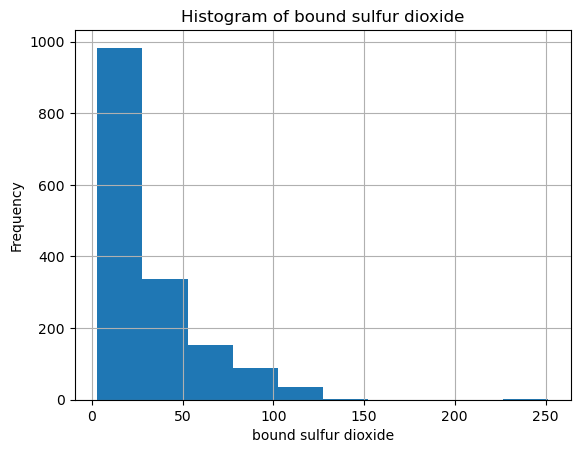

In [25]:
histogram(wine, 'bound sulfur dioxide')

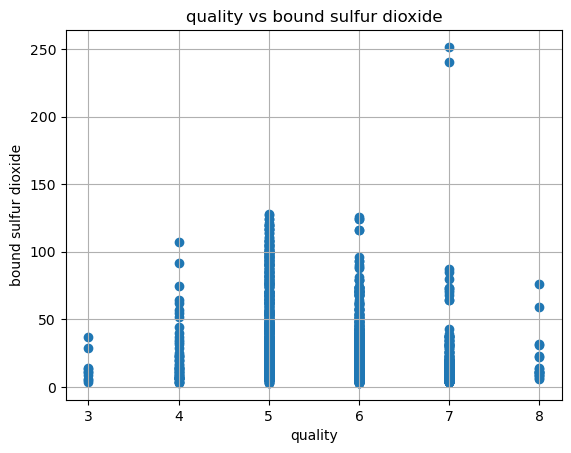

In [26]:
scatter(wine, 'quality', 'bound sulfur dioxide')

# DSC550 - Project Milestone 3

In [27]:
from sklearn.model_selection import train_test_split

wine2 = wine.drop('quality', axis=1)
X = wine2.drop('binary quality', axis=1)
y = wine['binary quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


When evaluating a wine, humans will make many decisions on whether or not they enjoy the wine and what qualities stick out to them such as its sweetness, acidity, or alcohol level. I am going to test a Random Forrest model on my data because it simulates human decisions.

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=1)

rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

To evaluate this model, I am going to use Root Mean Squared Error. RMSE is the root of the MSE, which measures the average squared difference between predicted and actual values. When looking at some of the earlier scatterplots, it is evident that there are outliers that exist in the data, and since I would like to minimize the impact of the outliers on my model.

In [29]:
from sklearn.metrics import mean_squared_error
import numpy as np

rf_y_pred = rf_model.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
print(f"Root Mean Squared Error: {rf_rmse}")

Root Mean Squared Error: 0.2562219496842532


The RMSE of ~0.2562 is a good result, indicating that the model's predictions are, on average, very close to the actual values in the dataset. The RMSE suggests that on average the models predicitons are approximately 0.2562 units away from the true values.

Now lets see how this changes if the engineereed values are removed.

In [30]:
X2 = X.drop('total acidity', axis=1)
X2 = X2.drop('sugar acid ratio', axis=1)
X2 = X2.drop('bound sulfur dioxide', axis=1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=1)

In [31]:
rf_model_no_eng = RandomForestRegressor(n_estimators=100, random_state=1)

rf_model_no_eng.fit(X_train2, y_train2)

rf_y_pred_no_eng = rf_model_no_eng.predict(X_test2)

rf_rmse_no_eng = np.sqrt(mean_squared_error(y_test2, rf_y_pred_no_eng))
print(f"Root Mean Squared Error: {rf_rmse_no_eng}")

Root Mean Squared Error: 0.2553514734635381


The new RMSE is very similar to the previous model's RMSE, this suggests that the changes I made by removing the engineered columns did not significantly impact the model's predictive performance.